In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# Matlab-style plotting
from sodapy import Socrata

In [44]:
nyc_case_hosp = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/case-hosp-death.csv')

In [45]:
nyc_case_hosp.drop(columns= ['HOSPITALIZED_COUNT', 'DEATH_COUNT'],inplace=True)
nyc_case_hosp.rename(columns= {'DATE_OF_INTEREST':'Date', 'NEW_COVID_CASE_COUNT':'Newcase'}, inplace = True)
nyc_case_hosp['Date'] = pd.to_datetime(nyc_case_hosp['Date'])
nyc_case_hosp['Date'] = nyc_case_hosp['Date'].dt.date
nyc_case_hosp['Date']

0     2020-03-03
1     2020-03-04
2     2020-03-05
3     2020-03-06
4     2020-03-07
         ...    
58    2020-04-30
59    2020-05-01
60    2020-05-02
61    2020-05-03
62    2020-05-04
Name: Date, Length: 63, dtype: object

In [46]:
week_case = []
week = []
weeks = int(len(nyc_case_hosp)/7)
for i in range(weeks):
    week_case.append(sum(nyc_case_hosp['CASE_COUNT'][i*7:i*7+7]))
    week.append(nyc_case_hosp['Date'][i*7].strftime('%m/%d') + '-' + nyc_case_hosp['Date'][i*7+6].strftime('%m/%d'))

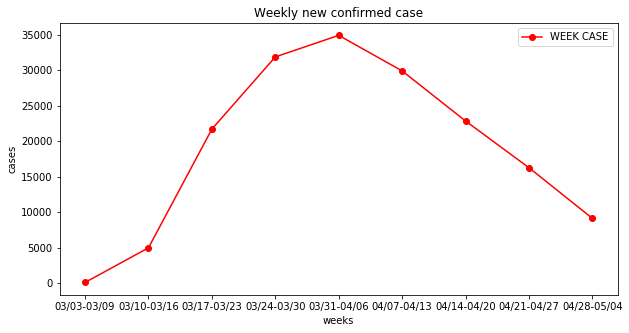

In [47]:
plt.figure(num=1, figsize=(10, 5))
plt.title("Weekly new confirmed case")
plt.plot(week,week_case,'o-',color = 'r',label="WEEKLY CASE")
plt.xlabel("weeks")
plt.ylabel("cases")
plt.legend(loc = "best")
plt.show()

In [49]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get_all("8vv7-7wx3")

# Convert to pandas DataFrame
tem_df = pd.DataFrame.from_records(results)
# tem_df = tem_df[tem_df['notificationtype'].apply(lambda x: x == 'Public Health')]
tem_df.rename(columns ={'date_and_time': 'Date'}, inplace = True )
tem_df.drop(columns = ['email_body'], axis = 1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16910 entries, 0 to 16909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   record_id           16910 non-null  object
 1   Date                16910 non-null  object
 2   notificationtype    16910 non-null  object
 3   notification_title  16910 non-null  object
dtypes: object(4)
memory usage: 528.6+ KB


'2020-05-05T12:00:00.000'

In [50]:
tem_df['Date'] = pd.to_datetime(tem_df['Date'])
tem_df['Date'] = tem_df['Date'].dt.date

<class 'pandas.core.series.Series'>


In [51]:
#pd.set_option('display.max_rows', None)
da='2019-01'
de = '2020-05'
tem_df['Date'] = tem_df['Date'].apply(lambda x: x.strftime('%Y-%m'))
_df = tem_df.groupby('Date')['record_id'].count().reset_index(name='count')
_df.sort_values(by='Date' , ascending=False)
_df = _df[_df['Date'].apply(lambda x: x >= da and x < de)]

In [52]:
phn = []
rcn = []
den = []
snn = []
mtdn = []
pn = []
man = []
un = []
pan = []
fn = []
for d in _df['Date']:
    phn.append(len(tem_df[(tem_df['notificationtype'] == 'Public Health') & (tem_df['Date'] == d)]))
    rcn.append(len(tem_df[(tem_df['notificationtype'] == 'Road Closure') & (tem_df['Date'] == d)]))
    den.append(len(tem_df[(tem_df['notificationtype'] == 'Drills / Exercises') & (tem_df['Date'] == d)]))
    snn.append(len(tem_df[(tem_df['notificationtype'] == 'School Notification') & (tem_df['Date'] == d)]))
    mtdn.append(len(tem_df[(tem_df['notificationtype'] == 'Mass Transit Disruption') & (tem_df['Date'] == d)]))
    pn.append(len(tem_df[(tem_df['notificationtype'] == 'Parking') & (tem_df['Date'] == d)]))
    man.append(len(tem_df[(tem_df['notificationtype'] == 'Missing Adult') & (tem_df['Date'] == d)]))
    un.append(len(tem_df[(tem_df['notificationtype'] == 'Utility') & (tem_df['Date'] == d)]))
    pan.append(len(tem_df[(tem_df['notificationtype'] == 'Public Awareness') & (tem_df['Date'] == d)]))
    fn.append(len(tem_df[(tem_df['notificationtype'] == 'Fire') & (tem_df['Date'] == d)]))

In [53]:
#new_df = tem_df.groupby('Date')['record_id'].count().reset_index(name='count')

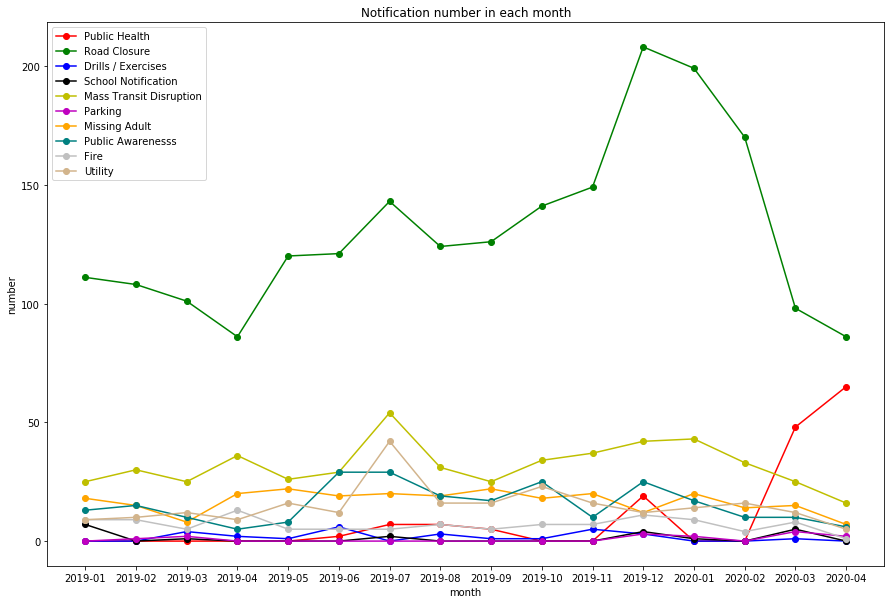

In [54]:
plt.figure(num=1, figsize=(15, 10))
plt.title("Notification number in each month")
plt.plot(_df['Date'],phn,'o-',color = 'r',label="Public Health")
plt.plot(_df['Date'],rcn,'o-',color = 'g',label="Road Closure")
plt.plot(_df['Date'],den,'o-',color = 'b',label="Drills / Exercises")
plt.plot(_df['Date'],snn,'o-',color = 'k',label="School Notification")
plt.plot(_df['Date'],mtdn,'o-',color = 'y',label="Mass Transit Disruption")
plt.plot(_df['Date'],pn,'o-',color = 'm',label="Parking")
plt.plot(_df['Date'],man,'o-',color = 'orange',label="Missing Adult")
plt.plot(_df['Date'],pan,'o-',color = 'teal',label="Public Awarenesss")
plt.plot(_df['Date'],fn,'o-',color = 'silver',label="Fire")
plt.plot(_df['Date'],un,'o-',color = 'tan',label="Utility")
plt.xlabel("month")
plt.ylabel("number")
plt.legend(loc = "best")
plt.show()

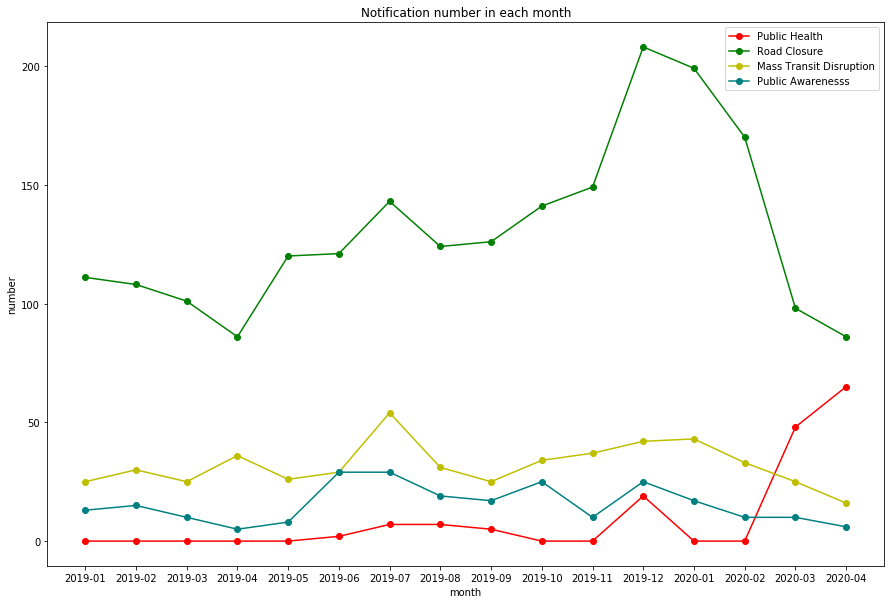

In [55]:
plt.figure(num=1, figsize=(15, 10))
plt.title("Notification number in each month")
plt.plot(_df['Date'],phn,'o-',color = 'r',label="Public Health")
plt.plot(_df['Date'],rcn,'o-',color = 'g',label="Road Closure")
plt.plot(_df['Date'],mtdn,'o-',color = 'y',label="Mass Transit Disruption")
plt.plot(_df['Date'],pan,'o-',color = 'teal',label="Public Awarenesss")
plt.xlabel("month")
plt.ylabel("number")
plt.legend(loc = "best")
plt.show()